# init

Include any initialization and paste any function needed here...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

### You can include any initilization lines or paste all functions you need such as bisection here ###
def incsearch(func, xmin, xmax, npts = 20): #incsearch function
    """Search for brackets containing roots of a function

    incsearch(func, xmin, xmax, npts)
    Finds brackets within [xmin,xmax] interval containing the roots of the function func
    Input:
    - func: an anonymous function
    - xmin, xmax: lower and upper limits of the interval
    - npts: number of points within the interval (optional, default = 20)
    Output:
    - nb: number of brackets found
    - xb: an array containing the upper and lower limits of all brackets.
          xb[i][1] and xb[i][2] are the lower and upper limits of the ith bracket.
          If nb=0, xb=[] which indicates that no brackets are found.
    """

    x = np.linspace(xmin, xmax, npts)     # generate npts number of points within [xmin,xmax] interval
    fx = func(x)                          # calculate the value of the function at all points within x
    xsize = np.size(x) # obtain the size of x
    nb = 0   # number of brackets = 0 initially
    xb = []  # brackets = empty initially
    for i in range(xsize-1):                #  loop over elements of x from 0 to xsize-1
        if np.sign(fx[i] * fx[i + 1]) < 0:  # checking for sign change. If a bracket is found do the following:
            nb = nb + 1                     # increase the bracket count by 1
            xb.append((x[i], x[i + 1]))     # add the bracket to xb
    if xb==[]:  # if no brackets found display a message
        print("<> no brackets found within the [xmin,xmax] interval. Change the interval or increase npts")
    return nb, xb   #returns nb and xb

def bisection(func, xmin, xmax, tol = 1e-4, maxit = 50, *args): #bisection function
    """Finds roots of a function using biection method

    bisection(func, xmin, xmax, tol = 1e-4, maxit = 50, *args):
    Finds roots of a function (func=0) using biection method
    Input:
    - func: an anonymous function
    - xmin, xmax: lower and upper limits of the interval
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    

    small = 1e-20 # a small number
    f1=func(xmin, *args) #func value at xmin
    f2=func(xmax, *args) #func value at xmax    
    if f1 * f2 > 0: # chech the sign change between xmin and xmax
        print('Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval')
        return
    elif f1 == 0:  #if f1=0, xmin is the root -> return f1
        iter = 0
        err = 0
        fx = 0
        return f1, fx, err, iter
    elif f2 == 0:  #if f2=0, xmax is the root -> return f2
        iter = 0
        err = 0
        fx = 0        
        return f2, fx, err, iter
    
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
    xl = xmin   # lower limit of the interval
    xu = xmax   # upper limit of the interval
    xr = xl     # set initial value for the root
    
    while err > tol and iter < maxit: # while err is greater than the tolerance 
                                      # and iter < maxit continue the loop
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       xr = 0.5 * (xl + xu) #xr is midpoint between xl and xr
       err=abs((xr-xr_old)/(xr + small))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)

       f1 = func(xl, *args) #func value at xl
       f2 = func(xr, *args) #func value at xu    
       ff = f1 * f2 
       if ff < 0:
           xu = xr
       elif ff > 0:
           xl = xr
       else:
          err= 0 # if ff=0, xr is the root -> set err=0 to end the while loop
           
    root = xr
    fx = func(root, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: bisection function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')

    return xr, fx, err, iter   #returns xr, fx, err, iter

def newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args): #newtonRaphson function
    """Finds roots of a function using Newton-Raphson method

    newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args)
    Finds roots of a function (f(x)=0) using Newton-Raphson method
    Input:
    - func: an anonymous function for f(x)
    - dfunc: an anonymous function for the derivative of f(x)
    - x0: initial guess of the root
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
        
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
    small = 1e-20 # a small number
    xr = x0
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       fx = func(xr, *args)   #func value at xr 
       if fx == 0: # if fx=0, xr is the root -> terminate the function
           err = 0
           return xr, fx, err, iter
       dfx = dfunc(xr, *args) #derivative of func value at xr 
       xr = xr - fx / (dfx + small)        # (a small number is added to the 
                                           # denominator to avoid /0 in case dfx=0)

       err=abs((xr-xr_old)/(xr + small))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root = xr
    fx = func(root, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: newtonRaphson function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')

    return xr, fx, err, iter   #returns xr, fx, err, iter

#Q1

Use the function `incsearch` to identify the brackets containing the roots of function $f(x)=\sin(35x)+\sin(15x+5)$ within the interval $[0,2]$. Verify that all the brackets are identified.

Number of brackets:  23
Brackets:
lower x limit   upper x limit
-------------  --------------
   0.0250         0.0300
   0.0900         0.0950
   0.1500         0.1550
   0.2750         0.2800
   0.4000         0.4050
   0.4050         0.4100
   0.5250         0.5300
   0.6500         0.6550
   0.7200         0.7250
   0.7750         0.7800
   0.9050         0.9100
   1.0300         1.0350
   1.0350         1.0400
   1.1550         1.1600
   1.2800         1.2850
   1.3450         1.3500
   1.4050         1.4100
   1.5300         1.5350
   1.6550         1.6600
   1.6600         1.6650
   1.7800         1.7850
   1.9100         1.9150
   1.9750         1.9800


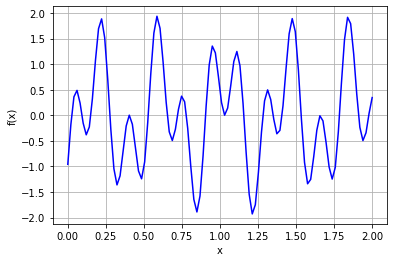

In [ ]:
# Q1 answer
f = lambda x: np.sin(35 * x) + np.sin(15 * x + 5)
nb, xb = incsearch(f, 0, 2, 401)  #calling the incsearch function (npts=20 by default)
# Printing nb and xb on the screen
x = np.linspace(0, 2, 100)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')
print('Number of brackets: ', nb)
print("Brackets:")
print('lower x limit   upper x limit')
print('-------------  --------------')
for i in range(nb): # printing xb as a table (formatted output)
    print('  {0:7.4f}        {1:7.4f}' .format(xb[i][0],xb[i][1]))


#Q2

Determine the positive real root of $\ln(x^2)=0.7$ by (a) graphically by plotting the function, (b) using three iterations of bisection method by hand in the interval [0.5, 2], and (c) using the python function `bisection` with the default error tolerance.

root: x =  1.419067144393921
f(x) =  -5.696689975298597e-07
approximate error =  5.0403234274736944e-05  %
number of iterations =  21


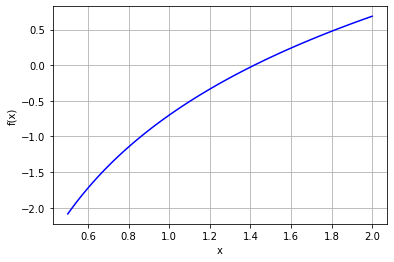

In [ ]:
# Q2 answer
f = lambda x: np.log(x**2) - 0.7
x = np.linspace(0.5, 2, 100)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')
root, fx, err , iter= bisection(f, 0.5, 2)  #calling the incsearch function with default tol=1e-4 (%) and maxit=50
print('root: x = ', root)
print('f(x) = ', fx)
print('approximate error = ', err, ' %')
print('number of iterations = ' ,iter)

Part b: 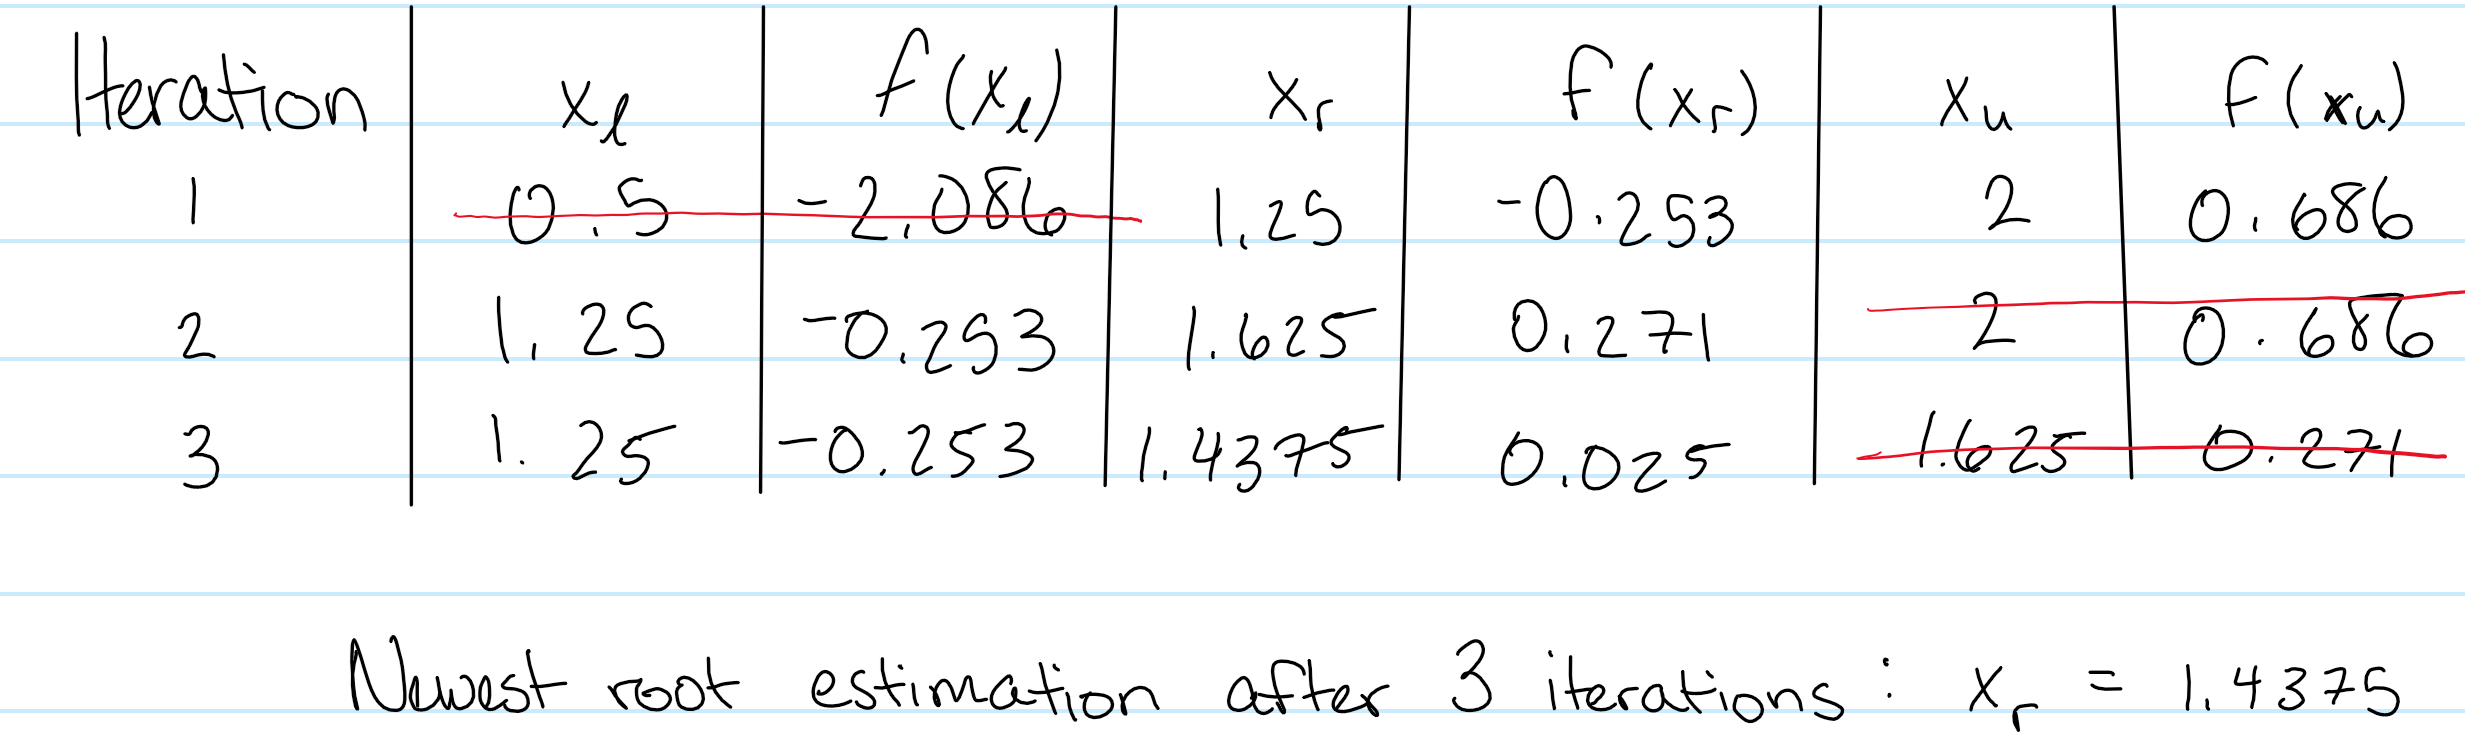

#Q3

The Fanning friction factor $f$ in fluid dynamics is calculated as $\frac{1}{\sqrt{f}}=4 \log_{10} (Re \sqrt{f})-0.4$ where $Re$ is the Reynolds number. Typical values for the Fanning friction factor in turbulent flows are 0.001 to 0.01. Develop a python function using the following template that uses the bisection method to calculate and returns $f$ given a user-supplied value of $Re$ between 10,000 and 1,000,000 with error tolerance of $10^{{-7}}\%$. Use the function to plot $f$ as a function of $Re$ on a semi-log plot, in which $Re$ is on the log axis (similar to Moody chart). 


Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [xmin,xmax] interval
Function does not change sign between xmin and xmax. Change the [

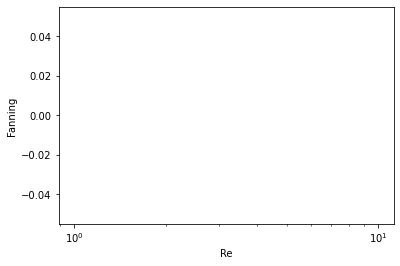

In [ ]:
# Q3 answer
def fanning(Re):
    """ Finds the fanning frction factor as a function of Reynolds number (Re)
    ...
    """
    func=lambda f: 4*np.log10(Re * np.sqrt(f)) - 0.4 - (1/np.sqrt(f)) # put the math. function here in the form func(f)=0
    root = bisection(func, 10000, 1000000, tol=1e-7, maxit=100) # call bisection 
    return root  #the root is the fanning factor (f)


Rex=(np.logspace(4,6,100)) # points with log spacing from Re=1e4 to 1e6. Set your desired number of points to generate
f= np.zeros(len(Rex)) #initiate f to be a list with the same size as Rex, it can contain zeros
for i in range(len(f)): #complete the loop
  f[i]=fanning(Rex[i])   #call fanning function
plt.semilogx(Rex,f,'bo-');  #plot
plt.xlabel('Re');
plt.ylabel('Fanning');


#Q4

The concentration of pollutant bacteria $c$ in a lake decreases according to
$c=77e^{-1.5t}+20e^{-0.08t}$. Determine the time required for the bacteria concentration to be reduced to $15$ using the Newton-Raphson method with an initial guess of $t = 6$ and the error tolerance of $1\%$.
1.   Use hand calculations
2.   Use `newtonRaphson` function
3.   Use the `fsolve` function

In [ ]:
# Q4 answer
f = lambda x: 77*np.exp(-1.5*x) + 20*np.exp(-.08*x) - 15
df = lambda x: -115.5*np.exp(-1.5*x) -1.6*np.exp(-.08*x)
root, fx, err , iter= newtonRaphson(f, df, 6, tol = 1)  #calling the newtonRasphson function
print('root: x= ', root)
print('f(x)= ', fx)
print('error = ', err, '%')
print('number of iterations= ', iter)
x0 = 6 # initial guess
tol = 1 # error tolerance
xf = fsolve(f, x0, xtol = tol, fprime = df) #fprime input paramter is used to specify the derivative of the function
x_fsol = xf[0]
#et = abs((xt - x_fsol) / xt) * 100  # true error (%)
print('root predicted by fsolve = ' , x_fsol)
#print('true error of fsolve = ', et, '%')

root: x=  3.809500042000004
f(x)=  5.3358579776841e-08
error =  0.010507081999769682 %
number of iterations=  4
root predicted by fsolve =  3.954523258842341


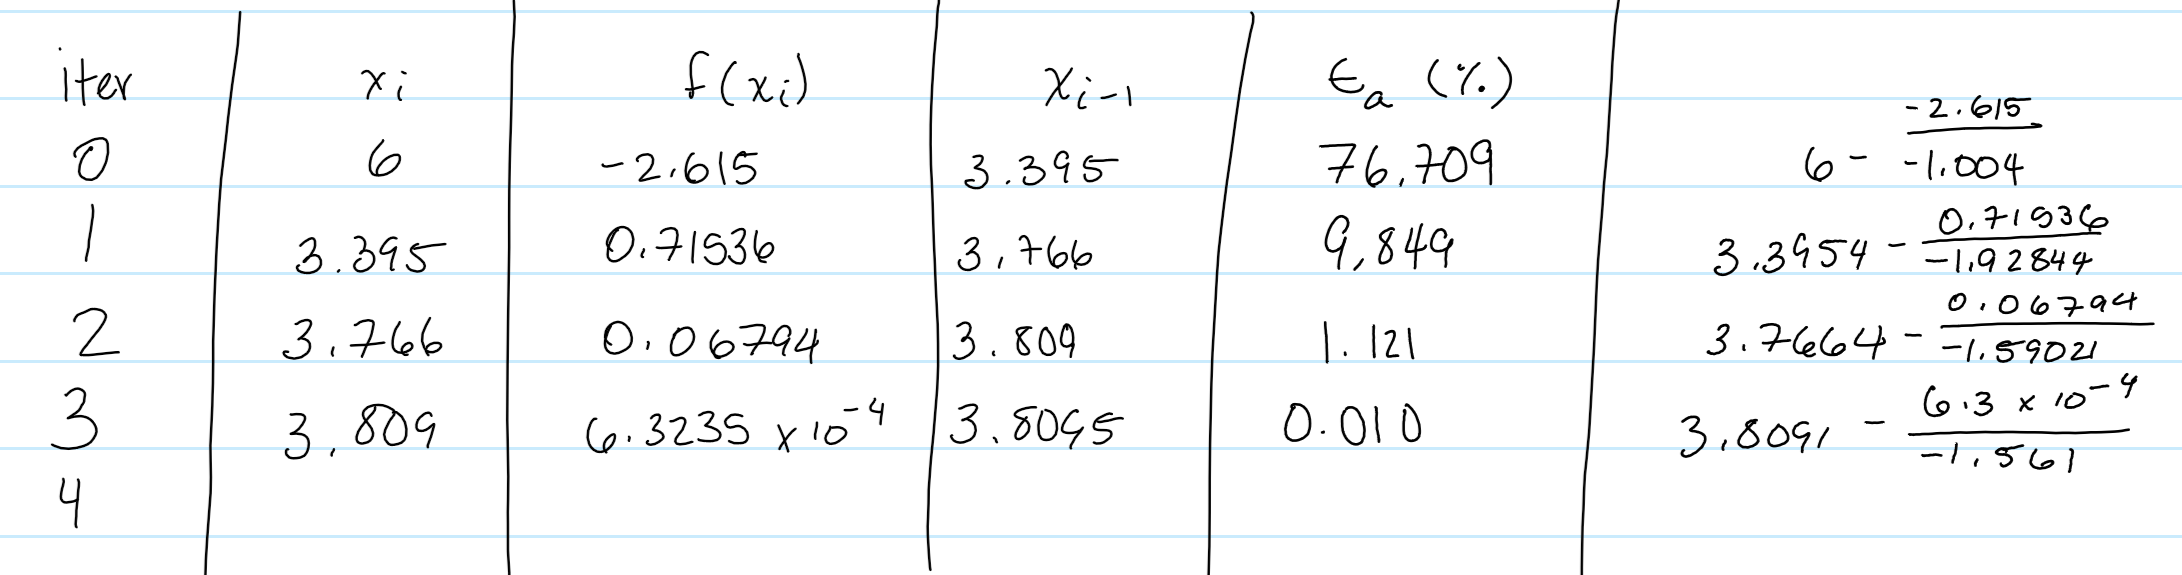

#Q5

Find the root of $x^{4}=5x+10$ using fixed-point iteration method. (a) Determine the formulation that converges for initial guesses in the range of $0 < x < 7$ based on fixed-point iteration method convergence criterion, and (b)
using part (a) result, write a code (using the template given below) to find the root with error tolerance of $10^{-5}\%$. Check to ensure that the root satisfies the function.

In [ ]:
# Q5 answer
def fixedPoint(func,x0,tol=1e-4,maxit=100): # fixed point iteration function definition
    """Finds roots of a function using Fixed Point Iterations method

    fixedPoint(func, x0, tol = 1e-4, maxit = 100)
    Finds roots of a function (x=f(x)) using Fixed Point Iterations method
    Input:
    - func: an anonymous function for f(x) such that x=f(x)
            to obtain convergence the function much satisfy |f'(x)| < 1 
    - x0: initial guess of the root
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 100)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    iter = 0
    err = 1000
    x = x0
    while err > tol and iter < maxit: 
      iter += 1
      x2 = x
      x = func(x)
      fx = func(x) - x
      if x == 0:
        err = 100
      else:
        err = abs((x - x2) / x) * 100
 
          
      #print("| %1.8f | %1.8f | %1.6f | %1.0f |"%(x,\
       #                                          fx,\
        #                                         err,\
         #                                        iter))
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: fixedPoint function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')
    return x, fx, err, iter
    
f = lambda x: 5 / (4*(5*x + 10**(3/4)))  # define the f(x) such that x=f(x)
x, fx, err, iter = fixedPoint(f, 0, tol = 1e-5, maxit=100)#....... Call the fixedPoint function
print('| x = %1.12f | fx = %1.12f | err = %1.6f | iter = %1.0f |'%(x,\
                                            fx,\
                                            err,\
                                            iter))

| x = 0.190139747466 | fx = 0.000000000996 | err = 0.000004 | iter = 10 |
